In [1]:
%matplotlib inline

In [2]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
def red_sequence_width(magr, 
        x=[-22.5, -21, -20, -18, -15], 
        y=[0.05, 0.06, 0.065, 0.06, 0.06]):
    c2, c1, c0 = np.polyfit(x, y, deg=2)
    return c0 + c1*magr + c2*magr**2 

def main_sequence_width(magr, 
        x=[-22.5, -21, -20, -18, -15], 
        y=[0.1, 0.1, 0.1, 0.1, 0.1]):
    c2, c1, c0 = np.polyfit(x, y, deg=2)
    return c0 + c1*magr + c2*magr**2 

def red_sequence_peak(magr, 
    x=[-22.5, -21, -20, -19, -18, -15], 
    y=[0.95, 0.95, 0.8, 0.7, 0.7, 0.7]):
    c2, c1, c0 = np.polyfit(x, np.log(y), deg=2)
    return np.exp(c0 + c1*magr + c2*magr**2)

def main_sequence_peak(magr, 
    x=[-22.5, -21, -20, -19, -18, -15], 
    y=[0.65, 0.65, 0.6, 0.4, 0.4, 0.35]):
    c2, c1, c0 = np.polyfit(x, np.log(y), deg=2)
    return np.exp(c0 + c1*magr + c2*magr**2)

def quiescent_fraction(magr,
    x=[-22.5, -21, -20, -19.5, -19, -18, -15], 
    y=[0.85, 0.65, 0.6, 0.50, 0.50, 0.2, 0.1]):
    c2, c1, c0 = np.polyfit(x, np.log(y), deg=2)
    return np.exp(c0 + c1*magr + c2*magr**2)

from astropy.utils.misc import NumpyRNGContext 

def g_minus_r(magr, seed=None):
    magr = np.atleast_1d(magr)
    
    ngals = len(magr)    
    with NumpyRNGContext(seed):
        is_quiescent = np.random.rand(ngals) < quiescent_fraction(magr)
        
    red_sequence = np.random.normal(
        loc=red_sequence_peak(magr[is_quiescent]), 
        scale=red_sequence_width(magr[is_quiescent]))
    star_forming_sequence = np.random.normal(
        loc=main_sequence_peak(magr[~is_quiescent]), 
        scale=main_sequence_width(magr[~is_quiescent]))
    
    result = np.zeros(ngals).astype('f4')
    result[is_quiescent] = red_sequence
    result[~is_quiescent] = star_forming_sequence
    return result

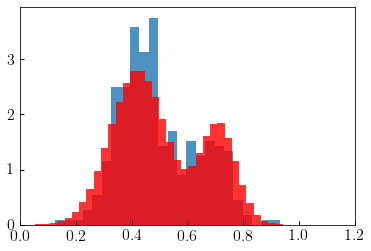

In [4]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask

magr_max = -18.

magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], 
                          magr_min, magr_max)
sdss_sample_gr = sdss['restframe_extincted_sdss_gr'][mask]

r = np.zeros(npts) + magr_max

gr = g_minus_r(r)

fig, ax = plt.subplots(1, 1)

nbins = 40
__=ax.hist(sdss_sample_gr, bins=nbins, alpha=0.8, normed=True)
__=ax.hist(gr, bins=nbins, alpha=0.8, normed=True, color='red')

# ylim = ax.set_ylim(0, 5)
xlim = ax.set_xlim(0, 1.2)

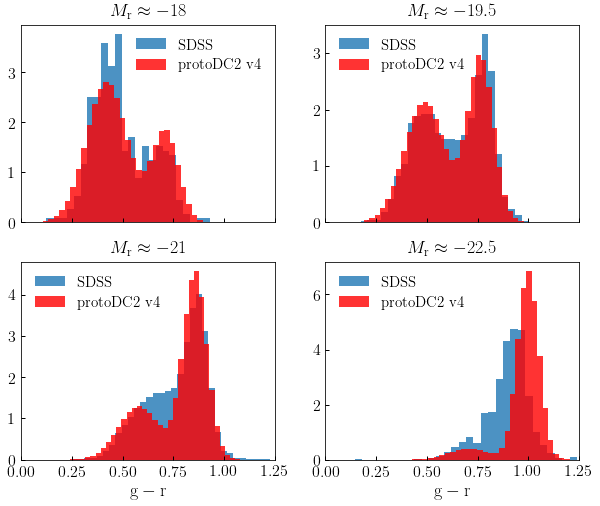

In [11]:
npts = int(1e6)

from cosmodc2.sdss_colors.sdss_completeness_model import retrieve_sdss_sample_mask

magr_max = -18.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr18 = sdss['restframe_extincted_sdss_gr'][mask]
gr18 = g_minus_r(np.zeros(npts) + magr_max)

magr_max = -19.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr19p5 = sdss['restframe_extincted_sdss_gr'][mask]
gr19p5 = g_minus_r(np.zeros(npts) + magr_max)

magr_max = -21.
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr21 = sdss['restframe_extincted_sdss_gr'][mask]
gr21 = g_minus_r(np.zeros(npts) + magr_max)

magr_max = -22.5
magr_min = magr_max - 0.3
mask = retrieve_sdss_sample_mask(
    sdss['z'], sdss['restframe_extincted_sdss_abs_magr'], magr_min, magr_max)
sdss_sample_gr22p5 = sdss['restframe_extincted_sdss_gr'][mask]
gr22p5 = g_minus_r(np.zeros(npts) + magr_max)


fig, _axes = plt.subplots(2, 2, figsize=(10, 8))

((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

nbins = 40

__=ax1.hist(sdss_sample_gr18, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax1.hist(gr18, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax2.hist(sdss_sample_gr19p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax2.hist(gr19p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax3.hist(sdss_sample_gr21, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax3.hist(gr21, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

__=ax4.hist(sdss_sample_gr22p5, bins=nbins, alpha=0.8, normed=True, label=r'${\rm SDSS}$')
__=ax4.hist(gr22p5, bins=nbins, alpha=0.8, normed=True, 
            color='red', label=r'${\rm protoDC2\ v4}$')

for ax in axes:
    xlim = ax.set_xlim(0, 1.25)
    leg = ax.legend()

ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
title1 = ax1.set_title(r'$M_{\rm r} \approx -18$')
title2 = ax2.set_title(r'$M_{\rm r} \approx -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} \approx -21$')
title4 = ax4.set_title(r'$M_{\rm r} \approx -22.5$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r}$')
xlabel4 = ax4.set_xlabel(r'${\rm g-r}$')

figname = 'sdss_gr_distribution_vs_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3], bbox_inches='tight')

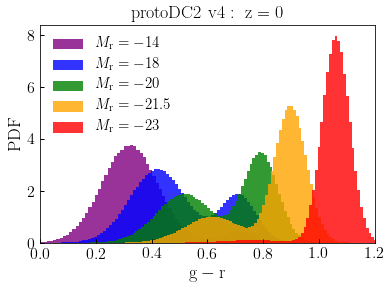

In [14]:
npts = int(1e6)

fig, ax = plt.subplots(1, 1)

nbins = 100
__=ax.hist(g_minus_r(np.zeros(npts) + -14), bins=nbins, normed=True, 
           alpha=0.8, color='purple', label=r'${M_{\rm r} = -14}$')
__=ax.hist(g_minus_r(np.zeros(npts) + -18), bins=nbins, normed=True, 
           alpha=0.8, color='blue', label=r'${M_{\rm r} = -18}$')
__=ax.hist(g_minus_r(np.zeros(npts) + -20), bins=nbins, normed=True, 
           alpha=0.8, color='green', label=r'${M_{\rm r} = -20}$')
__=ax.hist(g_minus_r(np.zeros(npts) + -21.5), bins=nbins, normed=True, 
           alpha=0.8, color='orange', label=r'${M_{\rm r} = -21.5}$')
__=ax.hist(g_minus_r(np.zeros(npts) + -23), bins=nbins, normed=True, 
           alpha=0.8, color='red', label=r'${M_{\rm r} = -23}$')

xlim = ax.set_xlim(0, 1.2)
legend = ax.legend()
xlabel = ax.set_xlabel(r'${\rm g-r}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
title = ax.set_title(r'${\rm protoDC2\ v4:\ z=0}$')

figname = 'analytical_gr_distribution_pdc2v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

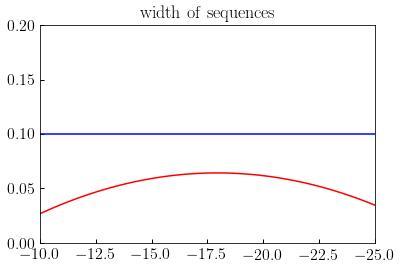

In [7]:
magr_test = np.linspace(-25, -10, 100)

fig, ax = plt.subplots(1, 1)

__=ax.plot(magr_test, red_sequence_width(magr_test), color='red')
__=ax.plot(magr_test, main_sequence_width(magr_test), color='blue')

title = ax.set_title(r'${\rm width\ of\ sequences}$')
ylim = ax.set_ylim(0, 0.2)
xlim = ax.set_xlim(-10, -25)

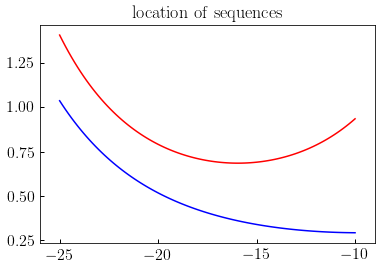

In [8]:
xmin, xmax = -25, -10
magr_test = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(1, 1)

__=ax.plot(magr_test, red_sequence_peak(magr_test), color='red')
__=ax.plot(magr_test, main_sequence_peak(magr_test), color='blue')

title = ax.set_title(r'${\rm location\ of\ sequences}$')
xlim = ax.set_xlim(xmin-1, xmax+1)
# ylim = ax.set_ylim(0, 1.5)
